# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pada bulan apa sepeda mengalami penurunan ?
- Apa alasan yang paling berpengaruh terhadap penurunan peminjaman sepeda ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


## Data Wrangling

### Gathering Data

In [2]:
#Load Dataset
day=pd.read_csv('day.csv')
hour=pd.read_csv('hour.csv')
#Menggabungkan Dataset
df=pd.concat([day,hour])
#Menampilkan 5 data pertama dalam dataset
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


**Insight:**
- Pada dataset awal yaitu day dan hour memiliki perbedaan kolom yaitu pada dataset hour memiliki kolom hr atau jam sedangkan pada dataset day tidak memiliki kolom hr
- Pada dataset ini memiliki beberapa baris dengan kolom yang kosong, yaitu pada kolom hr

### Assessing Data

In [9]:
#Memeriksa informasi kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     18110 non-null  int64         
 1   dteday      18110 non-null  datetime64[ns]
 2   season      18110 non-null  int64         
 3   yr          18110 non-null  int64         
 4   mnth        18110 non-null  int64         
 5   holiday     18110 non-null  int64         
 6   weekday     18110 non-null  int64         
 7   workingday  18110 non-null  int64         
 8   weathersit  18110 non-null  int64         
 9   temp        18110 non-null  float64       
 10  atemp       18110 non-null  float64       
 11  hum         18110 non-null  float64       
 12  windspeed   18110 non-null  float64       
 13  casual      18110 non-null  int64         
 14  registered  18110 non-null  int64         
 15  cnt         18110 non-null  int64         
 16  hr          18110 non-null 

In [10]:
# Mengecek missing value
missing_value=df.isnull().sum()
print("Jumlah missing value pada dataset :" ,missing_value)


Jumlah missing value pada dataset : instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
dtype: int64


In [11]:
# Mengecek duplikasi data
duplicate_data=df.duplicated().sum()
print("Jumlah duplikasi data pada dataset :", duplicate_data)


Jumlah duplikasi data pada dataset : 0


In [6]:
#Fungsi untuk mendeteksi outlier data
def detect_outliers(df):
    numeric_columns = df.select_dtypes(include=['number'])  # Pilih hanya kolom numerik
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR)))
    outlier_counts = outliers.sum()

    # Menampilkan hasil
    print("Jumlah Outlier dalam kolom")
    for col, count in outlier_counts.items():
        print(f"{col:<15}{count}")

    return outlier_counts
outlier_counts = detect_outliers(df)

Jumlah Outlier dalam kolom
instant        0
season         0
yr             0
mnth           0
holiday        521
weekday        0
workingday     0
weathersit     3
temp           0
atemp          0
hum            23
windspeed      343
casual         1602
registered     1254
cnt            1047
hr             0


**Insight:**
- Pada dataset memiliki missing value sebanyak 731 pada kolom hr dan tidak memiliki duplikasi pada data
- Pada dataset ini memiliki banyak outlier pada beberapa kolom
- Pada kolom dteday perlu dilakukan perubahan tipe data dari object ke datetime

### Cleaning Data

In [12]:
# Mengisi missing value dengan nilai mean atau rata rata dari kolom hr
df['hr'] = df['hr'].fillna(df['hr'].mean())
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,11.546752
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,11.546752
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,11.546752
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,11.546752
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,11.546752


In [13]:
#Mengubah tipe data pada kolom dteday
df['dteday']=pd.to_datetime(df['dteday'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     18110 non-null  int64         
 1   dteday      18110 non-null  datetime64[ns]
 2   season      18110 non-null  int64         
 3   yr          18110 non-null  int64         
 4   mnth        18110 non-null  int64         
 5   holiday     18110 non-null  int64         
 6   weekday     18110 non-null  int64         
 7   workingday  18110 non-null  int64         
 8   weathersit  18110 non-null  int64         
 9   temp        18110 non-null  float64       
 10  atemp       18110 non-null  float64       
 11  hum         18110 non-null  float64       
 12  windspeed   18110 non-null  float64       
 13  casual      18110 non-null  int64         
 14  registered  18110 non-null  int64         
 15  cnt         18110 non-null  int64         
 16  hr          18110 non-null 

**Insight:**
- Pada proses ini yaitu melakukan cleaning data dengan mengisi missing value dengan menggunakan mean dan mengubah tipe data pada kolom dteday agar dataset di proses ditahap EDA


## Exploratory Data Analysis (EDA)

### Explore Dataset Bike

In [14]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,18110.000000,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
mean,8354.006405,2012-01-02 03:00:25.046935552,2.501436,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,11.546752
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3797.250000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,6.000000
50%,8324.500000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,11.546752
75%,12851.750000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,17.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,23.000000
std,5180.771860,NaN,1.107045,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,6.773412


In [15]:
# Menghitung total ,rata-rata,max,min peminjaman berdasarkan setiap season
df.groupby('season')['cnt'].agg(
    total_peminjaman='sum',
    rata_rata_peminjaman='mean',
    max_peminjaman='max',
    min_peminjaman='min'
)


,total_peminjaman,rata_rata_peminjaman,max_peminjaman,min_peminjaman
season,,,,
1,942696,213.134976,7836,1
2,1837178,399.995210,8362,1
3,2122258,453.086678,8714,1
4,1683226,381.683900,8555,1


In [16]:
# Menghitung total ,rata-rata,max,min peminjaman berdasarkan user casual
casual_user=df.groupby('casual')['cnt'].agg(
    total_peminjaman='sum',
    rata_rata_peminjaman='mean',
    max_peminjaman='max',
    min_peminjaman='min'
)
casual_user.head()


,total_peminjaman,rata_rata_peminjaman,max_peminjaman,min_peminjaman
casual,,,,
0,20920,13.232132,300,1
1,27181,25.121072,448,1
2,29786,37.279099,365,2
3,38656,55.460545,513,3
4,37314,66.513369,520,4


In [17]:
# Menghitung total ,rata-rata,max,min peminjaman berdasarkan user registered
registered_user=df.groupby('registered')['cnt'].agg(
    total_peminjaman='sum',
    rata_rata_peminjaman='mean',
    max_peminjaman='max',
    min_peminjaman='min'
)
registered_user.head()


,total_peminjaman,rata_rata_peminjaman,max_peminjaman,min_peminjaman
registered,,,,
0,35,1.458333,4,1
1,294,1.462687,7,1
2,648,2.644898,16,2
3,1154,3.925170,14,3
4,1602,5.218241,21,4


In [21]:
#menampilkan jumlah peminjaman berdasarkan hari
Total=df.groupby('dteday')['cnt'].sum()
MaxTotal=Total.max()
MinTotal=Total.min()

print("Jumlah Peminjaman Terbanyak :",MaxTotal)
print("Jumlah Peminjaman Terendah :",MinTotal)

Jumlah Peminjaman Terbanyak : 17428
Jumlah Peminjaman Terendah : 44


**Insight:**
- Jumlah peminjaman sepeda dengan total terbanyak yaitu pada musim gugur dengan total 2122258 dan peminjaman terendah pada musim semi sebanyak 942696
- Jumlah peminjaman sepeda terbanyak dalam 1 hari yaitu 17428 sepeda dan terendah sebanyak 44 sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa sepeda mengalami penurunan ?

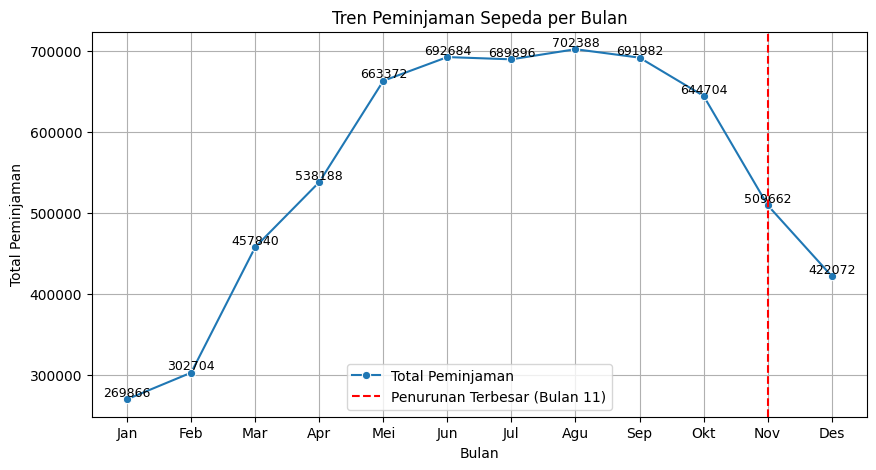

In [19]:
# Mengelompokkan data berdasarkan bulan dan menghitung total peminjaman sepeda
monthly_trend = df.groupby('mnth')['cnt'].sum().reset_index()

# Menghitung perubahan jumlah peminjaman dari bulan ke bulan
monthly_trend['change'] = monthly_trend['cnt'].diff()

# Menentukan bulan dengan penurunan peminjaman terbesar
month_with_biggest_drop = monthly_trend.loc[monthly_trend['change'].idxmin(), 'mnth']

# Membuat plot tren peminjaman sepeda per bulan
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', marker='o', label='Total Peminjaman')

# Menandai bulan dengan penurunan peminjaman terbesar
plt.axvline(x=month_with_biggest_drop, color='red', linestyle='--', label=f'Penurunan Terbesar (Bulan {month_with_biggest_drop})')

# Menambahkan label sumbu dan judul
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.title('Tren Peminjaman Sepeda per Bulan')

# Menyesuaikan tampilan sumbu x dengan label bulan
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

# Menampilkan jumlah peminjaman untuk setiap bulan pada grafik
for index, row in monthly_trend.iterrows():
    plt.text(row['mnth'], row['cnt'], f'{int(row["cnt"])}', ha='center', va='bottom', fontsize=9)

# Menambahkan legenda dan grid
plt.legend()
plt.grid()

# Menampilkan plot
plt.show()


### Pertanyaan 2: Apa alasan yang paling berpengaruh terhadap penurunan peminjaman sepeda ?

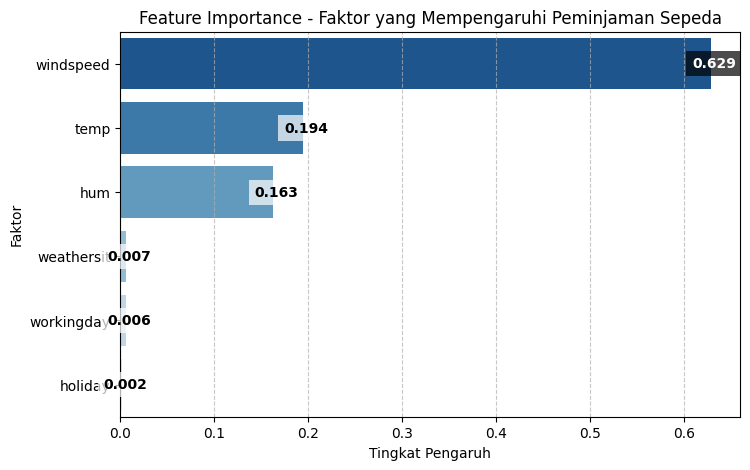

In [ ]:

# Memilih fitur yang relevan
features = ['weathersit', 'temp', 'hum', 'windspeed', 'holiday', 'workingday']
X = df[features]  # Variabel independen
y = df['cnt']  # Variabel dependen

# Melatih model RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Mengambil nilai feature importance
feature_importance = model.feature_importances_

# Membuat DataFrame untuk menampilkan hasil
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Membuat plot feature importance
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', palette='Blues_r', legend=False)


# Menambahkan label nilai pada batang
for index, value in enumerate(importance_df['Importance']):
    # Warna teks putih untuk batang besar, hitam untuk batang kecil
    text_color = 'white' if value > 0.2 else 'black'

    # Menyesuaikan posisi teks agar tidak keluar garis
    ax.text(value - 0.02, index, f'{value:.3f}', va='center', fontsize=10, color=text_color,
            fontweight='bold', bbox=dict(facecolor='black' if value > 0.2 else 'white', alpha=0.7, edgecolor='none'))

plt.xlabel('Tingkat Pengaruh')
plt.ylabel('Faktor')
plt.title('Feature Importance - Faktor yang Mempengaruhi Peminjaman Sepeda')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.show()


**Insight:**
- Peminjaman sepeda mengalami penurunan pada bulan 11 yaitu peminjaman berkurang 183320 dari bulan sebelumnya
- Berdasarkan analisis alasan yang paling berpengaruh dalam penurunan jumlah peminjaman yaitu karena kecepatan angin

## Analisis Lanjutan (Opsional)

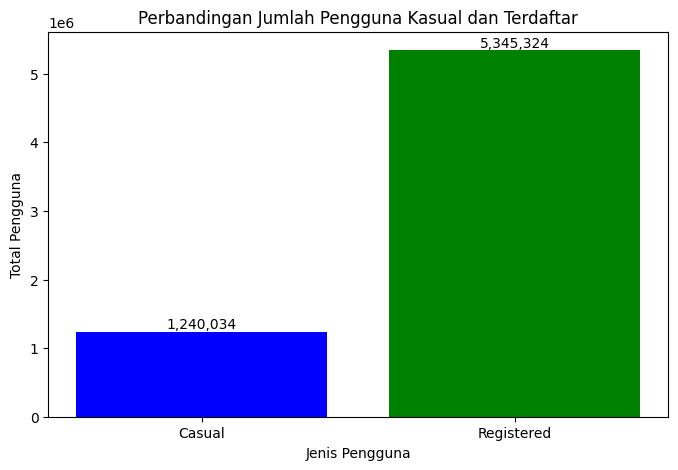

In [30]:
import matplotlib.pyplot as plt

# Menghitung jumlah total pengguna kasual dan pengguna terdaftar
holiday = df['holiday'].sum()
weekday = df['weekday'].sum()

# Membuat bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Casual', 'Registered'], [casual_user, registered_user], color=['blue', 'green'])

# Menambahkan label dan judul
plt.xlabel('Jenis Pengguna')
plt.ylabel('Total Pengguna')
plt.title('Perbandingan Jumlah Pengguna Kasual dan Terdaftar')

# Menampilkan jumlah di atas setiap batang
for i, val in enumerate([casual_user, registered_user]):
    plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.show()


**Insight:**
- Berdasarkan grafik ini menunujukkan total peminjaman dilakukan oleh user yang sudah terdaftar
**Rekomendasi:**
- Strategi yang dapat digunakan untuk mendorong pengguna kasual agar mendaftar adalah dengan menawarkan diskon atau promosi menarik yang dapat meningkatkan minat mereka untuk berlangganan


## Conclusion

- Conclution pertanyaan 1 : Berdasarkan tren peminjaman sepeda per bulan, jumlah peminjaman mengalami peningkatan dari Februari hingga Juni. Pada periode Juni hingga Agustus, jumlah peminjaman naik turun. Penurunan mulai terjadi sejak September, dengan penurunan paling signifikan terjadi pada bulan November

- Conclution pertanyaan 2 : Faktor yang berpengaruh dalam penurunan jumlah peminjaman sepeda adalah windspeed atau kecepatan angin dengan nilai pengaruh sebesar 0.629

Rekomendasi
1.   Program Khusus

Dengan menawarkan diskon harga untuk mendorong pelanggan dalam menyewa sepeda meskipun cuaca kurang mendukung

2.   Peningkatan Fasilitas

Tambahan
Menyediakan fasilitas atau aksesoris pendukung untuk meningkatkan kenyamanan dalam bersepeda

3.  Menyediakan Informasi Cuaca

Dengan menampilkan prakiraan cuaca pada aplikasi atau platform penyewaan sepeda

